## EDA  with Python

#### Overview
| Column Name          | Type   | Description                                                                                     |
|-----------------------|--------|-------------------------------------------------------------------------------------------------|
| number_of_strikes     | int64  | The total count of lightning strikes in that geographic tile on a given date                    |
| center_point_geom     | str    | String of characters representing the geographic center point of the strikes based on the latitude and longitude given |
| date    | str    | The recorded date (format: YYYY/MM/DD) |

In this notebook, we will use pandas to examine 2018 lightning strike data collected by the National Oceanic and Atmospheric Administration (NOAA). Then, we will calculate the total number of strikes for each month and plot this information on a bar graph.



### Import packages and libraries

Before getting started, we will need to import all the required libraries and extensions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
import matplotlib.font_manager as fm

# Get the list of font file paths
font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# Print the font names with error handling
for font_path in font_paths:
    try:
        font_name = fm.FontProperties(fname=font_path).get_name()
        print(font_name)
    except RuntimeError:
        # Skip fonts that cause errors
        continue


Chantrea UI
Kh Metal Chrieng
ABCTEXTTWO
Khmer Banteay Srey 
Tahoma
Khmer OS System
Bangla MN
Arial
Khmer Victorya Treykrim
Wat Phnom T3
Hiragino Sans
.New York
Gurmukhi Sangam MN
Khmer Unicode Serif
Noto Sans Samaritan
Charter
NiDA Taprom
Devanagari Sangam MN
CHHAY STYLE 7
Superclarendon
Kh Muol Pali
Khmer OS Fasthand
Hiragino Sans
Muna
Noto Sans Wancho
Source Code Pro
Bokor
Khmer Victorya Jrung
SignPainter
Noto Sans Tagalog
Ang Tasom
Source Code Pro
Noto Sans Mandaic
Marker Felt
Krungthep
AKbalthom KhmerNew
Khmer Unicode R1
Noto Sans Kannada
Myanmar Sangam MN
ABC-TEXT-4
Menlo
Khmer MEF2
Timbre Kampuchea
Noto Sans Palmyrene
Chalkboard
Noto Sans Canadian Aboriginal
LimonS7
CHHAY TEXT 1
Apple Braille
Khmer Mondulkiri-s xhigh
Copperplate
Limon S7
.SF Georgian
Trebuchet MS
STIXNonUnicode
Noto Sans Psalter Pahlavi
Bangla Sangam MN
Noto Sans Manichaean
Shree Devanagari 714
Sana
Noto Sans New Tai Lue
Khmer Wat Phnom
Hiragino Maru Gothic Pro
Khmer OS Siemreap
Limon F3
Noto Sans Tirhuta
.SF Heb

In [ ]:
import pandas as pd , numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [3]:
# Read in the 2018 lightning strike dataset.
df = pd.read_csv('5. Data Analysis Exercise .csv')

In [5]:
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [6]:
df.shape

(3401012, 3)

In [12]:
df.dtypes

date                 object
number_of_strikes     int64
center_point_geom    object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [16]:
df.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
dtype: int64

In [22]:
df['month_number'] = df['date'].str.split('-').str[1]

In [24]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# !pip install --upgrade pandas


In [48]:
# df.head()

In [44]:
df.dtypes

In [40]:
df.describe()

In [42]:
df['month']=df['date'].dt.strftime('%b')

In [46]:
df.head()

In [54]:
finall_data = df.groupby(['month', 'month_number'])['number_of_strikes'].agg(['sum',  'min','max']
                                                                            ).reset_index().sort_values(by= 'month_number')

In [64]:
finall_data

In [118]:
df.set_index(['center_point_geom'])

,date,number_of_strikes,month_number,month
center_point_geom,,,,
POINT(-75 27),2018-01-03,194,01,Jan
POINT(-78.4 29),2018-01-03,41,01,Jan
POINT(-73.9 27),2018-01-03,33,01,Jan
POINT(-73.8 27),2018-01-03,38,01,Jan
POINT(-79 28),2018-01-03,92,01,Jan
...,...,...,...,...
POINT(-90.6 28.7),2018-12-28,30,12,Dec
POINT(-89.4 30.9),2018-12-28,30,12,Dec
POINT(-89.5 31.4),2018-12-28,30,12,Dec


In [94]:
dataset = df.set_index(['date'])

In [116]:
dataset.head(2)

,number_of_strikes,center_point_geom,month_number,month
date,,,,
2018-01-03,194,POINT(-75 27),01,Jan
2018-01-03,41,POINT(-78.4 29),01,Jan


In [124]:
df['number_of_strikes'].sum()

44600989

In [128]:
dataset.resample('4d')['number_of_strikes'].sum()

date
2018-01-01     32347
2018-01-05    163565
2018-01-09    141368
2018-01-13     51088
2018-01-17     13001
               ...  
2018-12-15      9281
2018-12-19     51381
2018-12-23     30032
2018-12-27     75544
2018-12-31       784
Freq: 4D, Name: number_of_strikes, Length: 92, dtype: int64

In [100]:
df.groupby(df['date'])['number_of_strikes'].sum()

In [142]:
# fig, ax = plt.subplots(figsize = (16,8))
# sns.lineplot(y =df.groupby(df['date'])['number_of_strikes'].sum().index, x = df.groupby(df['date'])['number_of_strikes'].sum());

In [ ]:
plt.barh()

In [140]:
dataset.to_csv('Exerise3_.csv')

In [144]:
# finall_data

In [136]:
finall_data.to_csv('finall_3data_exericse_with_month.csv', index=False)

In [146]:
finall_data

,month,month_number,sum,min,max
4,Jan,01,860045,1,1611
3,Feb,02,2071315,1,1899
7,Mar,03,854168,1,562
0,Apr,04,1524339,1,1103
8,May,05,4166726,1,933
6,Jun,06,6445083,1,969
5,Jul,07,8320400,1,1473
1,Aug,08,15525255,1,2211
11,Sep,09,3018336,1,515
10,Oct,10,1093962,1,705


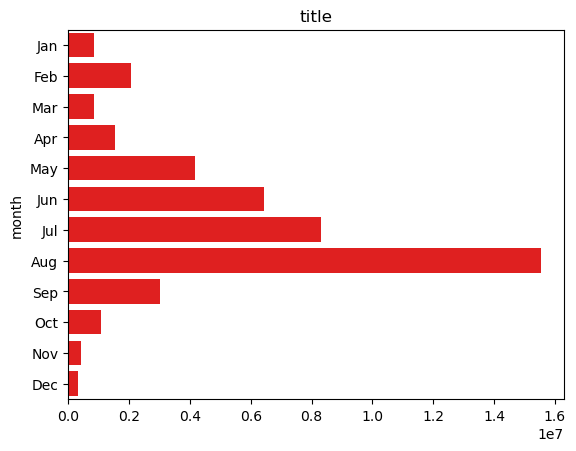

In [130]:
sns.barplot(y = finall_data['month'], x = finall_data['sum'], color='r', )
plt.title('title')
plt.xlabel('');

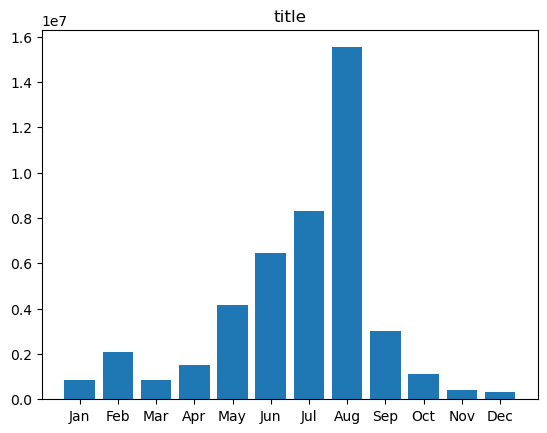

In [62]:
plt.bar(x = finall_data['month'], height=finall_data['sum'])
plt.title('title')
plt.xlabel('')
plt.ylabel('');

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date'].resample('3m').sum()

Notice that the data is structured as one row per day along with the geometric location of the strike. 

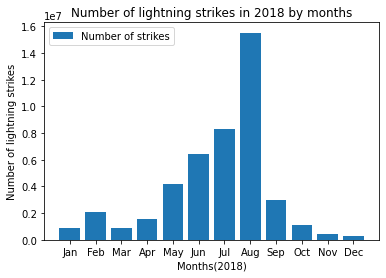